In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import collections
import seaborn as sns       # package for better viewing of networks
import operator 
import re

/Users/iris/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


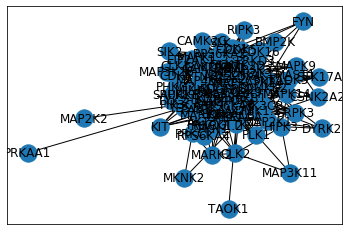

In [2]:
from EdgeWeightedNetworkBuilding import build_network_from_excel, build_network_from_df

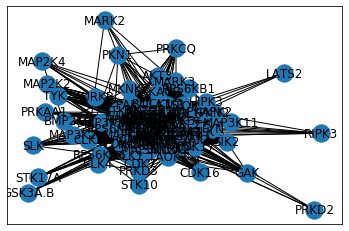

In [3]:
#build networks  using degree
G_degree = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="HL60", sheet_name = "m.nodes.edges", threshold = 0.2)

In [4]:
#save graph to file
nx.write_graphml_lxml(G_degree, "G_degree.graphml")

In [5]:
G_degree.degree

DegreeView({'ABL1': 55, 'ABL2': 66, 'AKT1': 70, 'ARAF': 78, 'CAMK2A': 67, 'CAMKK2': 83, 'CDK1': 63, 'CDK2': 75, 'CDK5': 63, 'CDK9': 81, 'CIT': 82, 'CSNK1E': 70, 'EIF2AK1': 60, 'ERN1': 80, 'HIPK3': 36, 'IRAK1': 78, 'KIT': 53, 'LATS1': 56, 'LIMK1.2': 61, 'MAP2K1': 66, 'MAP3K1': 75, 'MAP3K15': 61, 'MAP3K2': 30, 'MAP4K4': 66, 'MAP4K5': 73, 'MAPK1.3': 60, 'MAPK14': 70, 'MAPKAPK2': 50, 'MAST1': 60, 'MELK': 54, 'MINK1': 80, 'MKNK2': 28, 'MTOR': 50, 'PAK1': 73, 'PAK3': 72, 'PAK4': 51, 'PDGFRB': 60, 'PIK3CA': 71, 'PIK3CB': 56, 'PLK1': 76, 'PRKACA': 75, 'PRKACB': 39, 'PRKCI': 83, 'ROCK1.2': 52, 'RPS6KA2': 78, 'RPS6KA4': 67, 'SIK2': 42, 'SRPK1': 73, 'SRPK3': 61, 'STK3': 60, 'TAOK3': 78, 'TNK2': 74, 'TTK': 65, 'TYK2': 18, 'ULK1': 69, 'YES1': 76, 'CAMK2D': 67, 'CAMK2G': 61, 'CDK17': 47, 'CDK4': 49, 'CDK6': 61, 'CDKL5': 48, 'CLK1': 44, 'FYN': 45, 'GAK': 22, 'MAP3K3': 51, 'PAK2': 51, 'PHKG2': 69, 'PKN2': 42, 'PRKAA1': 12, 'PRKD3': 31, 'RPS6KA3': 60, 'AKT3': 27, 'CLK2': 32, 'CSNK2A2': 46, 'MAP2K2': 16

In [6]:
#weighted edge of node MTOR
G_degree.degree(['MTOR'],weight = 'HL60')

DegreeView({'MTOR': 472})

In [8]:
#sorted weighted edge
degree_sequence = sorted([d for n, d in G_degree.degree(weight = 'HL60')], reverse=True)  # degree sequence
print ("Degree sequence", degree_sequence)

Degree sequence [4758, 4519, 4254, 4166, 3725, 3703, 3654, 3470, 3451, 3187, 3159, 2886, 2592, 2518, 2143, 2109, 1745, 1447, 1401, 1271, 1254, 1239, 1174, 1039, 1032, 1023, 1002, 995, 951, 911, 891, 848, 836, 769, 714, 705, 702, 623, 623, 568, 496, 488, 472, 471, 468, 462, 439, 424, 419, 411, 408, 398, 390, 336, 333, 331, 302, 293, 289, 265, 250, 240, 224, 207, 197, 185, 161, 145, 137, 115, 112, 105, 92, 91, 90, 75, 74, 66, 64, 63, 61, 55, 54, 53, 45, 35, 29, 22, 22, 20, 18, 18, 14, 13, 12, 12, 10, 8, 6, 4]


Degree sequence [83, 83, 82, 81, 80, 80, 78, 78, 78, 78, 76, 76, 75, 75, 75, 74, 73, 73, 73, 72, 71, 70, 70, 70, 69, 69, 67, 67, 67, 66, 66, 66, 65, 63, 63, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 59, 56, 56, 55, 54, 53, 52, 51, 51, 51, 50, 50, 49, 48, 47, 46, 45, 44, 42, 42, 39, 39, 38, 36, 35, 32, 32, 31, 31, 30, 28, 27, 27, 26, 23, 22, 21, 18, 18, 16, 16, 16, 15, 14, 14, 14, 12, 10, 9, 9, 8, 6, 4, 4]


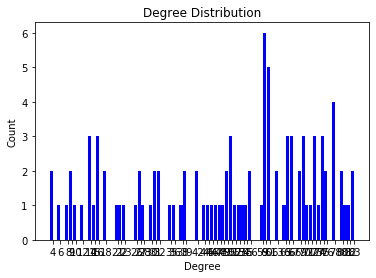

In [10]:
# Network Analysis From Edge Enrichment: degree distribution using degree with no weight, weight can be added by the method of last cell
degree_sequence = sorted([d for n, d in G_degree.degree()], reverse=True)  # degree sequence
print ("Degree sequence", degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G_degree), key=len, reverse=True)[0]
pos = nx.spring_layout(G_degree)
plt.axis('off')
#nx.draw_networkx_nodes(G, pos, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()


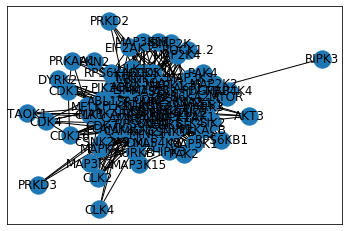

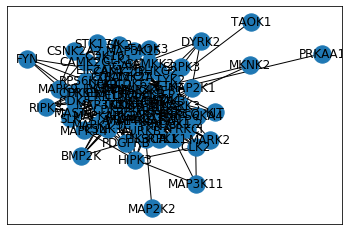

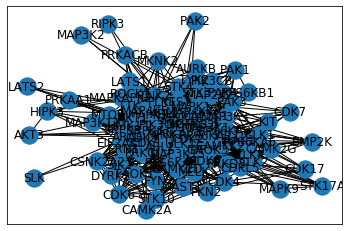

In [11]:
#build networks  using degree
G_degree_HL60 = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="HL60", sheet_name = "zScorenodes.edges", threshold = 0.2)
G_degree_MCF7 = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="MCF7", sheet_name = "zScorenodes.edges", threshold = 0.2)
G_degree_NTERA2 = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="NTERA2", sheet_name = "zScorenodes.edges", threshold = 0.2)

In [13]:
  # degree sequence
HL60_degree_sequence = sorted([d for n, d in G_degree_HL60.degree(weight = 'HL60')], reverse=True)
MCF7_degree_sequence = sorted([d for n, d in G_degree_MCF7.degree(weight = 'MCF7')], reverse=True)
NTERA2_degree_sequence = sorted([d for n, d in G_degree_NTERA2.degree(weight = 'NTERA2')], reverse=True)

print ("HL60 Degree sequence", HL60_degree_sequence)
print ("MCF7 Degree sequence", MCF7_degree_sequence)
print ("NTERA2 Degree sequence", NTERA2_degree_sequence)

HL60 Degree sequence [41.75513175933614, 38.05102723253956, 30.28931629056388, 28.35283289217158, 27.800118299798743, 27.703699875476847, 27.36543591753885, 26.155639890902012, 24.883336452329086, 24.315310814311506, 24.164547367876537, 23.743887315556442, 22.361392208483363, 22.16958608743737, 21.711568249186215, 21.693451744282523, 21.466317828642, 20.975332598468864, 20.79963815525193, 20.686206059852477, 20.56781672720616, 20.288258352118568, 19.918472043345787, 19.844579986462698, 19.746543316645532, 19.551664126025038, 17.513755534928098, 17.43781476744879, 17.309275237247906, 17.097130570327177, 16.8671379383735, 16.723468297496456, 16.624090812385607, 16.146343423919333, 15.761047083324113, 15.72334509801175, 15.408034533525758, 15.278143084137032, 14.529516881754569, 14.495543896001807, 14.124810436429245, 13.331488278175684, 12.721611745276086, 12.721611745276086, 12.290320817250093, 12.145080456907074, 11.489601654567345, 11.464510709334856, 10.924599998494193, 10.6622100860